This is the Rocket Problem

In [40]:
import math
from matplotlib import pyplot
%matplotlib inline
import numpy

Code Description and Objective: 
This code seks to simulate the flight of a rocket as it goes up, runs out of fuel, then falls down. There is a component of drag to take into account, as well as gravity. The fuel burn rate shows that fuel only burns for 5 seconds before stopping. 

This dynamic system appears to have two equations: One for height as a function of velocity, and one for velocity as a function of alot of other forces.

Plan of Action:
Step 1: Define input constants

Step 2: Create arrays to hold: time values, height values, velocity values

Step 3: create Euler code line for Height relationship

Step 4: Create Euler code line for Velocity Relationship


Initial Parameters

In [60]:
M_structure=50 #mass of rocket structure
G=9.81 #gravity, duh
density=1.091  #air density
radius=0.5 #rocket radius
Rocket_Area=3.14*radius**2 #Area of the Rocket
Exhaust_Velocity=325 #exhaust velocity
Cdrag=0.15 #coefficient of Drag 
M_propellant0=100 #initial weight of the rockets propellant
M_propellant=M_propellant0 #variable for rocket's propellant weight
M_Propellant_rate= 20 #Rate of change of propellant mass given by graph
Time_final= 60 #Arbitrary stopping time, rocket should be on ground by then.
dt=0.1

#My graphical representation will be a graph of Height vs Time

#Setting up my Time Axis
N=int(Time_final/dt)

In [42]:
print(N)

600


In [43]:
t=numpy.linspace(0,Time_final,N+1) #Create a time array to hold time values, should be 601 in length

In [44]:
print(t)

[  0.    0.1   0.2   0.3   0.4   0.5   0.6   0.7   0.8   0.9   1.    1.1
   1.2   1.3   1.4   1.5   1.6   1.7   1.8   1.9   2.    2.1   2.2   2.3
   2.4   2.5   2.6   2.7   2.8   2.9   3.    3.1   3.2   3.3   3.4   3.5
   3.6   3.7   3.8   3.9   4.    4.1   4.2   4.3   4.4   4.5   4.6   4.7
   4.8   4.9   5.    5.1   5.2   5.3   5.4   5.5   5.6   5.7   5.8   5.9
   6.    6.1   6.2   6.3   6.4   6.5   6.6   6.7   6.8   6.9   7.    7.1
   7.2   7.3   7.4   7.5   7.6   7.7   7.8   7.9   8.    8.1   8.2   8.3
   8.4   8.5   8.6   8.7   8.8   8.9   9.    9.1   9.2   9.3   9.4   9.5
   9.6   9.7   9.8   9.9  10.   10.1  10.2  10.3  10.4  10.5  10.6  10.7
  10.8  10.9  11.   11.1  11.2  11.3  11.4  11.5  11.6  11.7  11.8  11.9
  12.   12.1  12.2  12.3  12.4  12.5  12.6  12.7  12.8  12.9  13.   13.1
  13.2  13.3  13.4  13.5  13.6  13.7  13.8  13.9  14.   14.1  14.2  14.3
  14.4  14.5  14.6  14.7  14.8  14.9  15.   15.1  15.2  15.3  15.4  15.5
  15.6  15.7  15.8  15.9  16.   16.1  16.2  16.3  1

In [45]:
len(t)==601 #verifying length of the "t" array.

True

In [46]:
#create arrays to hold my altitude and velocit values

altitude=numpy.zeros(N+1)
velocity=numpy.zeros(N+1) #Both of these arrays should have 601 cells

In [47]:
len(altitude)==601

True

In [48]:
len(velocity)==601

True

In [49]:
#Initiallizing my velocity and height first cell
altitude[0]=0
velocity[0]=0

In [65]:
#creating variables to represent maximum velocity and height
max_altitude=0
max_velocity=0

MsMp= (M_structure+M_propellant)
MpVe= (M_Propellant_rate*Exhaust_Velocity)
RoACD=(density*Rocket_Area*Cdrag)

From here start the code, For Loops:

   Euler for Velocity "the hard way":  velocity[n+1]=velocity[n]+dt*(-G+(M_Propellant_rate*Exhaust_Velocity)/(M_structure+M_propellant)-(0.5)*(density*velocity[n]*abs(velocity[n])*Rocket_Area*Cdrag)/(M_structure+M_propellant))

In [68]:
#my step index for all analysis will be "n"
for n in range (0,N,1):
    
    altitude[n+1]=altitude[n]+dt*velocity[n]  #Euler to show time stepping of altitude
    Time_Axis=n*dt
    velocity[n+1]= velocity[n] + dt*(-G + MpVe/MsMp -(0.5)*velocity[n]*abs(velocity[n])*RoACD/MsMp)

In [69]:
print(velocity)

[   0.            3.35233333    6.70418543   10.05459409   13.40259837
   16.74723964   20.08756276   23.42261708   26.75145759   30.07314595
   33.38675154   36.69135253   39.98603685   43.26990321   46.54206205
   49.80163647   53.04776317   56.27959331   59.49629334   62.69704586
   65.88105034   69.04752389   72.19570193   75.32483891   78.43420886
   81.52310599   84.59084525   87.6367628    90.66021643   93.66058603
   96.6372739    99.58970507  102.51732761  105.41961281  108.29605541
  111.14617373  113.96950978  116.7656293   119.5341218   122.27460058
  124.98670259  127.67008842  130.32444216  132.94947118  135.54490602
  138.11050011  140.64602954  143.15129275  145.62611025  148.07032427
  150.4837984   152.86641721  155.21808583  157.53872955  159.82829337
  162.08674153  164.31405706  166.51024128  168.67531331  170.80930956
  172.91228322  174.98430371  177.02545619  179.035841    181.01557313
  182.9647817   184.88360936  186.77221182  188.63075726  190.45942582
  192.

In [70]:
print(altitude)

[  0.00000000e+00   0.00000000e+00   3.35233333e-01   1.00565188e+00
   2.01111129e+00   3.35137112e+00   5.02609509e+00   7.03485136e+00
   9.37711307e+00   1.20522588e+01   1.50595734e+01   1.83982486e+01
   2.20673838e+01   2.60659875e+01   3.03929778e+01   3.50471840e+01
   4.00273477e+01   4.53321240e+01   5.09600833e+01   5.69097127e+01
   6.31794173e+01   6.97675223e+01   7.66722747e+01   8.38918449e+01
   9.14243288e+01   9.92677497e+01   1.07420060e+02   1.15879145e+02
   1.24642821e+02   1.33708843e+02   1.43074901e+02   1.52738629e+02
   1.62697599e+02   1.72949332e+02   1.83491293e+02   1.94320899e+02
   2.05435516e+02   2.16832467e+02   2.28509030e+02   2.40462442e+02
   2.52689902e+02   2.65188573e+02   2.77955581e+02   2.90988026e+02
   3.04282973e+02   3.17837463e+02   3.31648513e+02   3.45713116e+02
   3.60028246e+02   3.74590857e+02   3.89397889e+02   4.04446269e+02
   4.19732911e+02   4.35254719e+02   4.51008592e+02   4.66991421e+02
   4.83200096e+02   4.99631501e+02

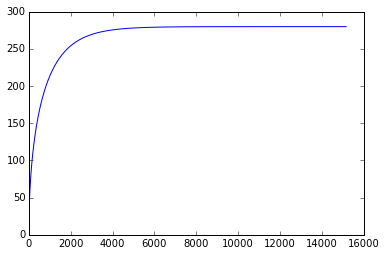

In [71]:
pyplot.plot(altitude, velocity)

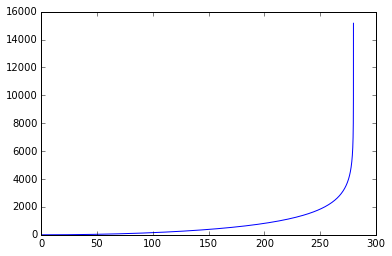

In [72]:
pyplot.plot(velocity, altitude)